# Week 4 - Data Understanding and Preparation (Part 2)

## Notes

> "The greatest value of a picture is when it forces us to notice what we never expected to see" - John W. Tukey

In [42]:
# Clear all the variables in the workspace
rm(list=ls())

# Importing the relevant libraries
suppressWarnings(library('gapminder'))
suppressWarnings(library('ggplot2'))
suppressWarnings(library('gridExtra'))
suppressWarnings(library('ggrepel'))
suppressWarnings(library('ggthemes'))
suppressWarnings(library('readr'))
suppressWarnings(library('dplyr'))
suppressWarnings(library('stringr'))

data(gapminder)
head(gapminder, 3)

country,continent,year,lifeExp,pop,gdpPercap
Afghanistan,Asia,1952,28.801,8425333,779.4453
Afghanistan,Asia,1957,30.332,9240934,820.8530
Afghanistan,Asia,1962,31.997,10267083,853.1007


In [2]:
glimpse(gapminder)

Observations: 1,704
Variables: 6
$ country   <fct> Afghanistan, Afghanistan, Afghanistan, Afghanistan, Afgha...
$ continent <fct> Asia, Asia, Asia, Asia, Asia, Asia, Asia, Asia, Asia, Asi...
$ year      <int> 1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 199...
$ lifeExp   <dbl> 28.801, 30.332, 31.997, 34.020, 36.088, 38.438, 39.854, 4...
$ pop       <int> 8425333, 9240934, 10267083, 11537966, 13079460, 14880372,...
$ gdpPercap <dbl> 779.4453, 820.8530, 853.1007, 836.1971, 739.9811, 786.113...


Now, because I can't install the `janitor` package on Jupyter, I use the method below to clean column names. What this does is converts everything to lower case and replaces spaces for underscores.

In [3]:
# colnames(gapminder) <- colnames(gapminder) %>% tolower() %>% str_replace_all(' ', '_')

There are many different types of techniques we use to visualise data. However, it is ultimately dependent on the **variable type**. If you already know how to code each graph type, here's a quick summary.

For categorical:
* Frequency count
* Bar plot

For numeric:
* Frequency histogram/polygon
* Variations (smooth density, cumulative frequency)
* Box-and-whisker plot

For categorical/discrete and continuous:
* 2 variable box plot
* 2 variable column plot

For continuous and continuous:
* Scatter plot / Correlation plot
* Regression line plot

---

### Categorical
* Frequency count
* Bar plot

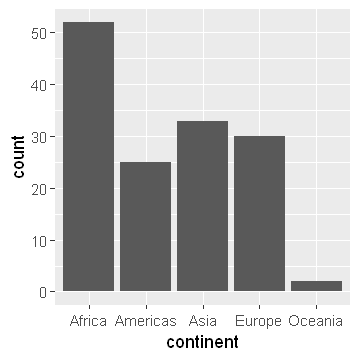

In [4]:
options(repr.plot.width = 3, repr.plot.height = 3)

barplot <- gapminder %>%
    filter(year==1952) %>%
    ggplot(aes(continent)) +
    geom_bar()
barplot

### Numeric
* Frequency histogram/polygon
* Variations (smooth density, cumulative frequency)
* Box-and-whisker plot

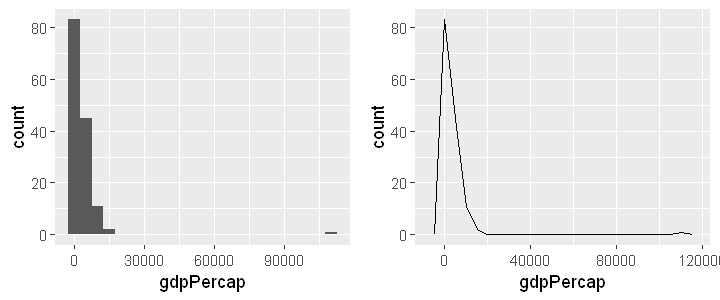

In [5]:
options(repr.plot.width = 6, repr.plot.height = 2.5)

histogram <- gapminder %>%
    filter(year==1952) %>%
    ggplot(aes(gdpPercap)) +
    geom_histogram(binwidth=5000)

freqpoly <- gapminder %>%
    filter(year==1952) %>%
    ggplot(aes(gdpPercap)) +
    geom_freqpoly(binwidth=5000)

grid.arrange(histogram, freqpoly, ncol=2)

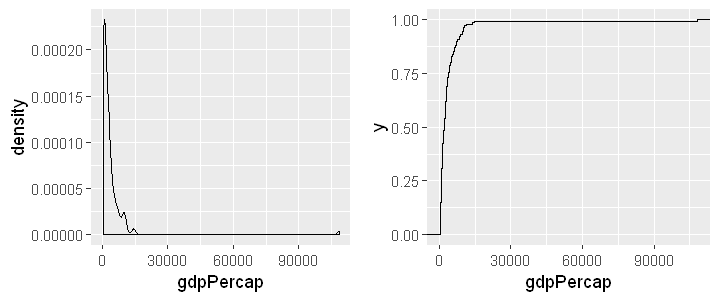

In [6]:
options(repr.plot.width = 6, repr.plot.height = 2.5)

smoothDensity <- gapminder %>%
    filter(year==1952) %>%
    ggplot(aes(gdpPercap)) +
    geom_density()

ecdf <- gapminder %>%
    filter(year==1952) %>%
    ggplot(aes(gdpPercap)) +
    stat_ecdf()

grid.arrange(smoothDensity, ecdf, ncol=2)

country,continent,year,lifeExp,pop,gdpPercap
Kuwait,Asia,1952,55.565,160000,108382.4


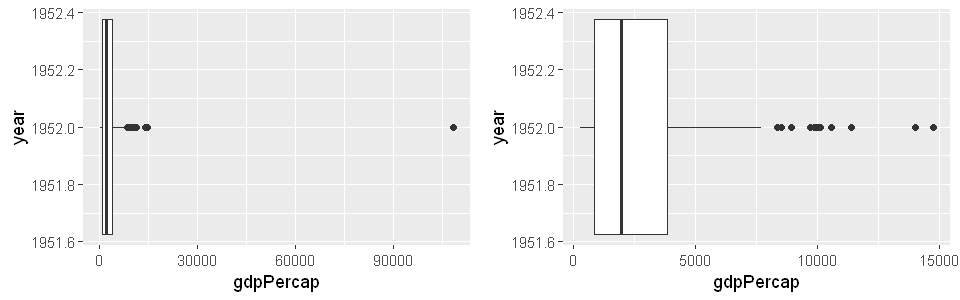

In [7]:
options(repr.plot.width = 8, repr.plot.height = 2.5)

box1 <- gapminder %>%
    filter(year==1952) %>%
    ggplot(aes(x=year, y=gdpPercap)) +
    geom_boxplot() +
    coord_flip()

# We can clearly see an outlier. So let's take a look at this point more closely.
gapminder %>% filter(year==1952, gdpPercap>30000)

# After removing this outlier:
box2 <- gapminder %>%
    filter(year==1952, gdpPercap<30000) %>%
    ggplot(aes(x=year, y=gdpPercap)) +
    geom_boxplot() +
    coord_flip()

grid.arrange(box1, box2, ncol=2)

### Categorical/discrete and continuous
* 2 variable box plot
* 2 variable column plot

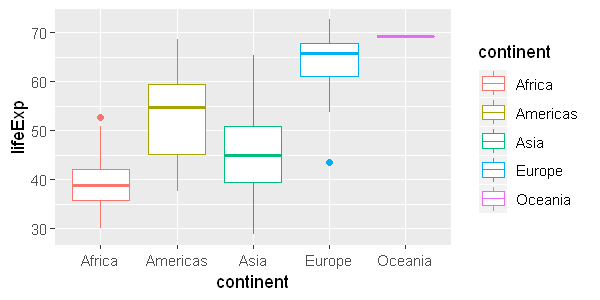

In [8]:
options(repr.plot.width = 5, repr.plot.height = 2.5)

gapminder %>%
    filter(year==1952) %>%
    ggplot(aes(x=continent, y=lifeExp, col=continent)) +
    geom_boxplot()

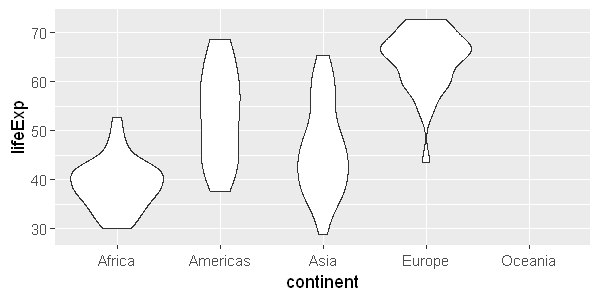

In [9]:
gapminder %>%
    filter(year==1952) %>%
    ggplot(aes(x=continent, y=lifeExp)) +
    geom_violin()

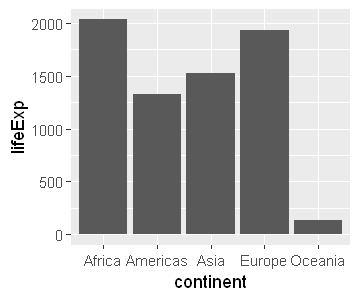

In [10]:
options(repr.plot.width = 3, repr.plot.height = 2.5)

gapminder %>%
    filter(year==1952) %>%
    ggplot(aes(x=continent, y=lifeExp)) +
    geom_col()

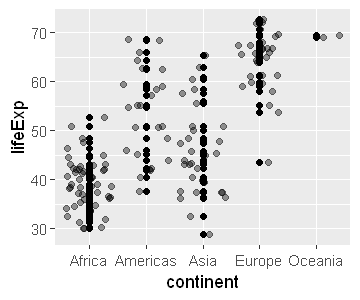

In [11]:
options(repr.plot.width = 3, repr.plot.height = 2.5)

gapminder %>%
    filter(year==1952) %>%
    ggplot(aes(x=continent, y=lifeExp)) +
    geom_point() +
    geom_jitter(alpha=0.4)

### Continuous and continuous
* Scatter plot / Correlation plot
* Regression line plot

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


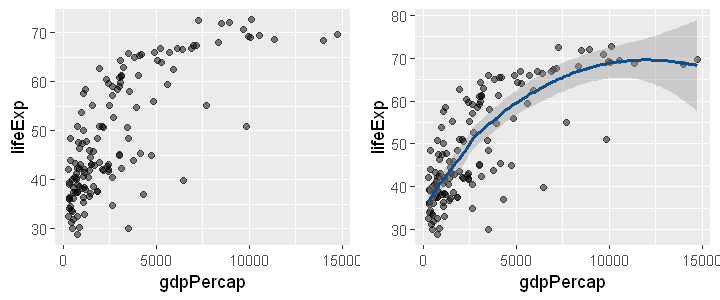

In [12]:
options(repr.plot.width = 6, repr.plot.height = 2.5)

scatter <- gapminder %>%
    filter(year==1952, gdpPercap<30000) %>%
    ggplot(aes(x=gdpPercap, y=lifeExp)) +
    geom_point(alpha=0.5)

regLine <- gapminder %>%
    filter(year==1952, gdpPercap<30000) %>%
    ggplot(aes(x=gdpPercap, y=lifeExp)) +
    geom_point(alpha=0.5) +
    geom_smooth(color='dodgerblue4')

grid.arrange(scatter, regLine, ncol=2)

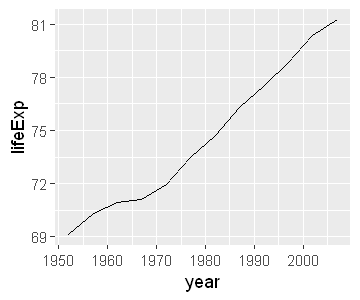

In [13]:
options(repr.plot.width = 3, repr.plot.height = 2.5)

gapminder %>%
    filter(country=='Australia') %>%
    ggplot(aes(x=year, y=lifeExp)) +
    geom_line()

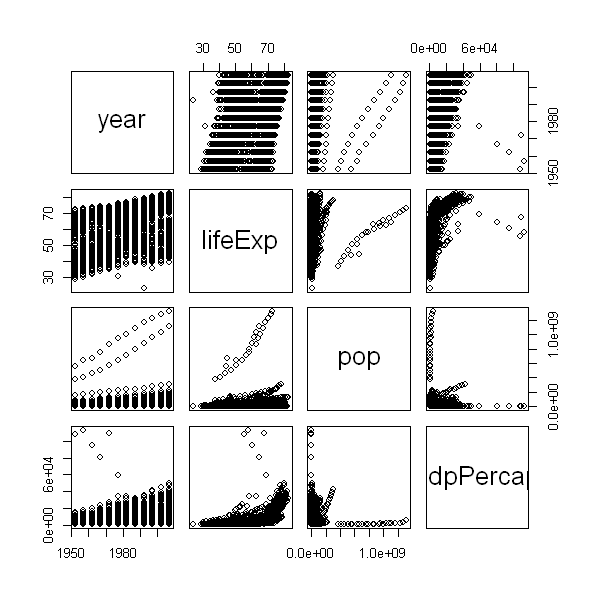

In [14]:
options(repr.plot.width = 5, repr.plot.height = 5)

pairs(gapminder[,3:6])

corrplot 0.84 loaded


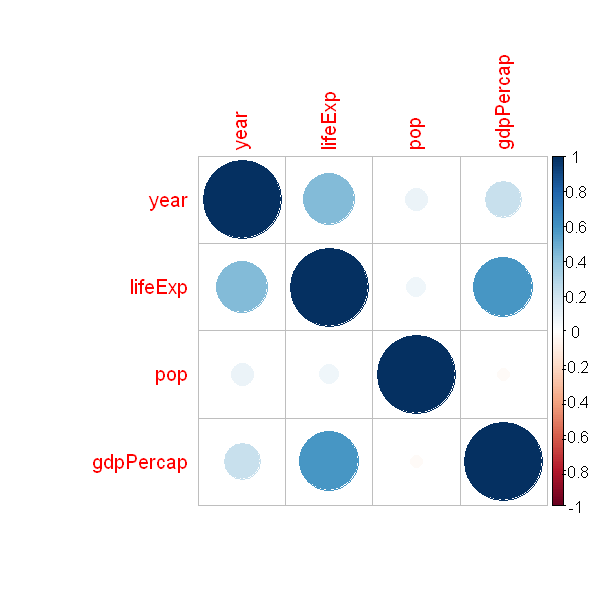

In [15]:
options(repr.plot.width = 5, repr.plot.height = 5)

suppressWarnings(library('corrplot'))
corrplot(cor(gapminder[,3:6], use='pairwise.complete.obs'))

---

### Grouping

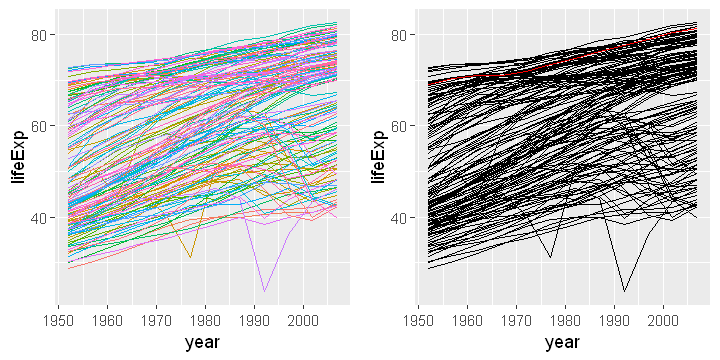

In [16]:
options(repr.plot.width = 6, repr.plot.height = 3)

allLifeExp <- gapminder %>%
    ggplot(aes(x=year, y=lifeExp, group=country, colour=country)) +
    geom_line(show.legend=FALSE)

ausGap <- gapminder %>% filter(country=='Australia')

ausLifeExp <- ggplot() +
    geom_line(data=gapminder, aes(x=year, y=lifeExp, group=country)) +
    geom_line(data=ausGap, aes(x=year, y=lifeExp), colour='red')

grid.arrange(allLifeExp, ausLifeExp, ncol=2)

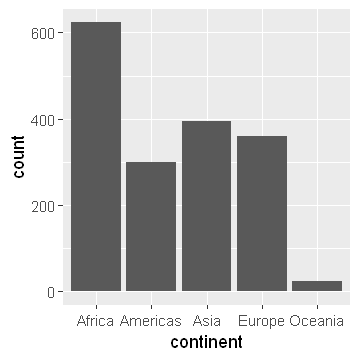

In [17]:
options(repr.plot.width = 3, repr.plot.height = 3)

gapminder %>% ggplot(aes(continent), fill=as.factor(country)) +
    geom_bar(show.legend=FALSE)

---

### Scaling

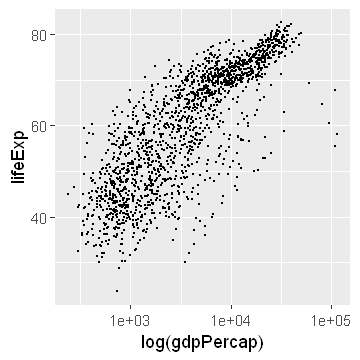

In [18]:
gapminder %>%
    ggplot(aes(x=gdpPercap, y=lifeExp)) +
    geom_point(size=0.25) +
    scale_x_log10() +
    xlab('log(gdpPercap)')

---

### Faceting

The facet approach partitions a plot into a matrix of panels. Each panel shows a different subset of the data.

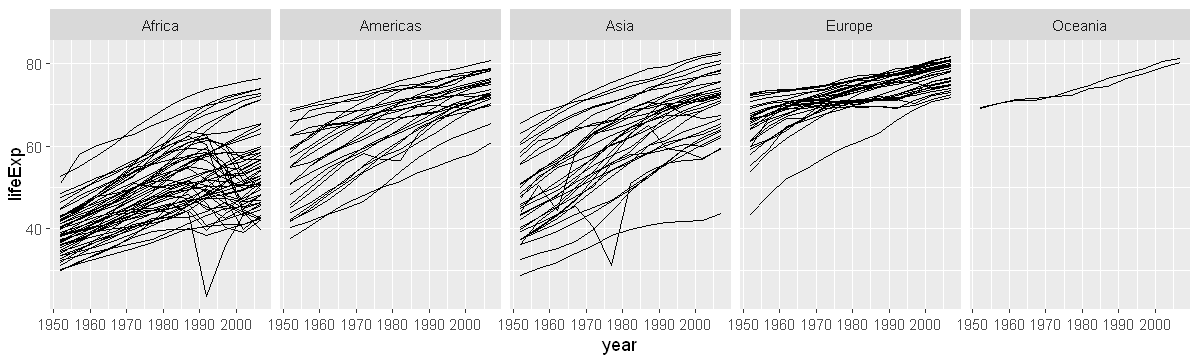

In [19]:
options(repr.plot.width = 10, repr.plot.height = 3)

gapminder %>% 
    ggplot(aes(x=year, y=lifeExp, group=country)) +
    geom_line() +
    facet_grid(. ~ continent) # This is row by column

Below we compare the use of `grid.arrange()` vs `facet_grid()`. Notice that using `grid.arrange()`, we have two different sets of axes. Whereas when using `facet_grid()`, all graphs share the same set of axes making it easier to compare values. This is similar to `sharex=True` or `sharey=True` in Python.

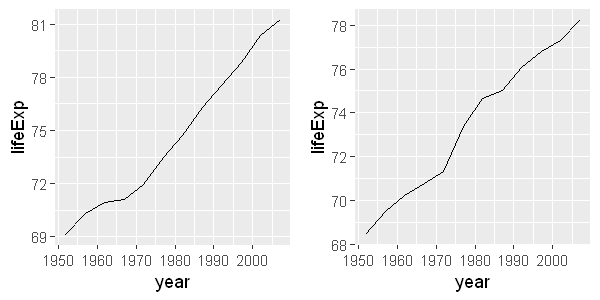

In [20]:
options(repr.plot.width = 5, repr.plot.height = 2.5)

ausGap <- gapminder %>%
    filter(country=='Australia') %>%
    ggplot(aes(x=year, y=lifeExp)) +
    geom_line()

usGap <- gapminder %>%
    filter(country=='United States') %>%
    ggplot(aes(x=year, y=lifeExp)) +
    geom_line()

grid.arrange(ausGap, usGap, ncol=2)

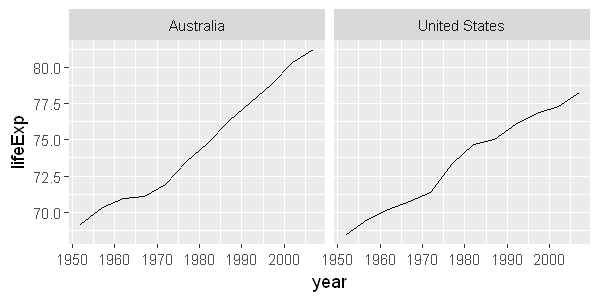

In [21]:
gapminder %>%
    filter(country %in% c('Australia', 'United States')) %>%
    ggplot(aes(x=year, y=lifeExp)) +
    geom_line() +
    facet_grid(. ~ country)

---

### Themes

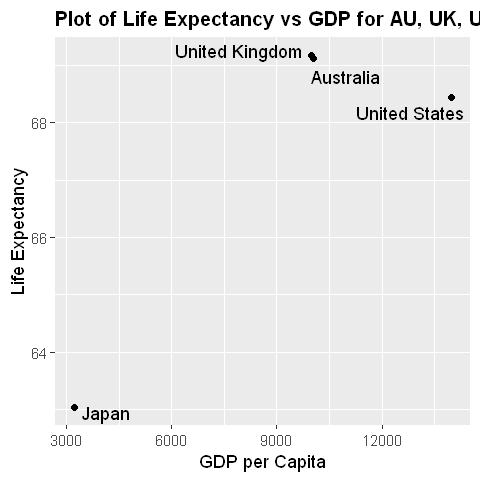

In [22]:
options(repr.plot.width = 4, repr.plot.height = 4)

gapminder %>%
    filter(year==1952, country %in% c('Australia', 'United States', 'United Kingdom', 'Japan')) %>%
    ggplot(aes(x=gdpPercap, y=lifeExp, label=country)) +
    geom_text_repel() +
    geom_point() +
    xlab('GDP per Capita') +
    ylab('Life Expectancy') +
    ggtitle('Plot of Life Expectancy vs GDP for AU, UK, US, JP') +
    theme(plot.title=element_text(size=12, face='bold'))

---

### `dplyr` verbs

In [23]:
gapminderall <- read_csv('data/01/Case Study 1 - Gapminder/gapminderall.csv', col_types=cols())
head(gapminderall)
glimpse(gapminderall)

country,year,infant_mortality,life_expectancy,fertility,population,gdp,continent,region
Albania,1960,115.40,62.87,6.19,1636054,NA,Europe,Southern Europe
Algeria,1960,148.20,47.50,7.65,11124892,13828152297,Africa,Northern Africa
Angola,1960,208.00,35.98,7.32,5270844,NA,Africa,Middle Africa
Antigua and Barbuda,1960,NA,62.97,4.43,54681,NA,Americas,Caribbean
Argentina,1960,59.87,65.39,3.11,20619075,108000000000,Americas,South America
Armenia,1960,NA,66.86,4.55,1867396,NA,Asia,Western Asia


Observations: 10,545
Variables: 9
$ country          <chr> "Albania", "Algeria", "Angola", "Antigua and Barbu...
$ year             <dbl> 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 19...
$ infant_mortality <dbl> 115.40, 148.20, 208.00, NA, 59.87, NA, NA, 20.30, ...
$ life_expectancy  <dbl> 62.87, 47.50, 35.98, 62.97, 65.39, 66.86, 65.66, 7...
$ fertility        <dbl> 6.19, 7.65, 7.32, 4.43, 3.11, 4.55, 4.82, 3.45, 2....
$ population       <dbl> 1636054, 11124892, 5270844, 54681, 20619075, 18673...
$ gdp              <dbl> NA, 13828152297, NA, NA, 108000000000, NA, NA, 966...
$ continent        <chr> "Europe", "Africa", "Africa", "Americas", "America...
$ region           <chr> "Southern Europe", "Northern Africa", "Middle Afri...


#### `mutate()`, `filter()`, and `arrange()`:

In [24]:
aus <- gapminderall %>%
    mutate(gdpPerCapita = gdp / population) %>%
    filter(country=='Australia') %>%
    arrange(desc(gdpPerCapita))
head(aus)

country,year,infant_mortality,life_expectancy,fertility,population,gdp,continent,region,gdpPerCapita
Australia,2007,4.5,81.235,1.92,20434176,7.04e+11,Oceania,Australia and New Zealand,34452.09
Australia,2002,5.0,80.370,1.76,19546792,6.00e+11,Oceania,Australia and New Zealand,30695.57
Australia,1997,5.4,78.830,1.78,18565243,5.01e+11,Oceania,Australia and New Zealand,26985.91
Australia,2011,3.8,82.200,1.88,22542371,5.73e+11,Oceania,Australia and New Zealand,25418.80
Australia,2008,4.4,81.600,1.96,21370348,5.43e+11,Oceania,Australia and New Zealand,25409.04
Australia,2010,4.1,82.000,1.89,22162863,5.63e+11,Oceania,Australia and New Zealand,25402.86


#### `summarise()`:

Note: By filtering, we avoid having to use the `na.rm=TRUE` argument which makes our code neater.

In [25]:
gapminderall %>% summarise(unique=n_distinct(country))

unique
185


In [26]:
aus %>%
    filter(!is.na(gdpPerCapita)) %>%
    summarise(mean=mean(gdpPerCapita), sd=sd(gdpPerCapita))

mean,sd
17743.2,5808.273


#### `pull()`:

Literally 'pulls' the raw data and returns it in a way that can be used in further operations. You'll notice that without `pull()`, `meanPop` is a data frame while with it, it becomes a numeric which allows us to do further operations.

In [27]:
meanPop <- gapminderall %>%
    filter(!is.na(population)) %>%
    summarise(meanPop=mean(population))
class(meanPop)
meanPop

[1] "tbl_df"     "tbl"        "data.frame"

meanPop
26984007


In [28]:
meanPop <- gapminderall %>%
    filter(!is.na(population)) %>%
    summarise(meanPop=mean(population)) %>%
    pull()
class(meanPop)
meanPop

[1] "numeric"

[1] 26984007

In [29]:
gapTemp <- gapminderall %>%
    filter(!is.na(gdp)) %>%
    mutate(gdpOverMeanPop = gdp / meanPop)
head(gapTemp, 3)

country,year,infant_mortality,life_expectancy,fertility,population,gdp,continent,region,gdpOverMeanPop
Algeria,1960,148.20,47.50,7.65,11124892,13828152297,Africa,Northern Africa,512.4573
Argentina,1960,59.87,65.39,3.11,20619075,108000000000,Americas,South America,4002.3708
Australia,1960,20.30,70.87,3.45,10292328,96677859364,Oceania,Australia and New Zealand,3582.7837


#### `group_by()`:

In [30]:
gapminderall %>%
    group_by(continent) %>%
    filter(!is.na(gdp)) %>%
    summarise(average=mean(gdp))

continent,average
Africa,12653648774
Americas,276732547728
Asia,188487927587
Europe,237024871163
Oceania,40006048234


In [31]:
 # Copies rows 4 and 5 to the bottom
gapDuplicate <- rbind(gapminderall, gapminderall[c(3,5),])
print(paste('gapDuplicate has', dim(gapDuplicate)[1], 'rows which is 2 more than gapminderall since we copies two rows.'))

# Now, these are the rows that are duplicated
print('The duplicated rows are:')
duplicates <- gapDuplicate[duplicated(gapDuplicate),]
duplicates
clean <- gapDuplicate[!duplicated(gapDuplicate),]
print(paste('clean has', dim(clean)[1], 'rows.'))

[1] "gapDuplicate has 10547 rows which is 2 more than gapminderall since we copies two rows."
[1] "The duplicated rows are:"


country,year,infant_mortality,life_expectancy,fertility,population,gdp,continent,region
Angola,1960,208.00,35.98,7.32,5270844,NA,Africa,Middle Africa
Argentina,1960,59.87,65.39,3.11,20619075,1.08e+11,Americas,South America


[1] "clean has 10545 rows."


## Practice Questions

### Question 1

In [32]:
gapminderall %>%
    select(country, year, infant_mortality) %>%
    filter(country %in% c('Turkey', 'Sri Lanka', 'Korea, Rep.',
                          'Poland', 'Malaysia', 'Russia', 'Pakistan',
                          'Vietnam', 'Thailand', 'South Africa')) %>%
    filter(year==2015)

country,year,infant_mortality
"Korea, Rep.",2015,2.9
Malaysia,2015,6.0
Pakistan,2015,65.8
Poland,2015,4.5
Russia,2015,8.2
South Africa,2015,33.6
Sri Lanka,2015,8.4
Thailand,2015,10.5
Turkey,2015,11.6
Vietnam,2015,17.3


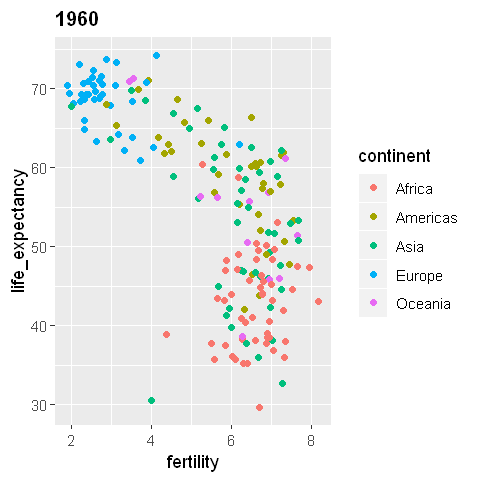

In [33]:
gapminderall %>%
    filter(year==1960) %>%
    ggplot(aes(x=fertility, y=life_expectancy, colour=continent)) +
    geom_point() +
    ggtitle('1960') +
    theme(plot.title=element_text(size=12, face='bold'))

Warning message:
"Removed 1 rows containing missing values (geom_point)."

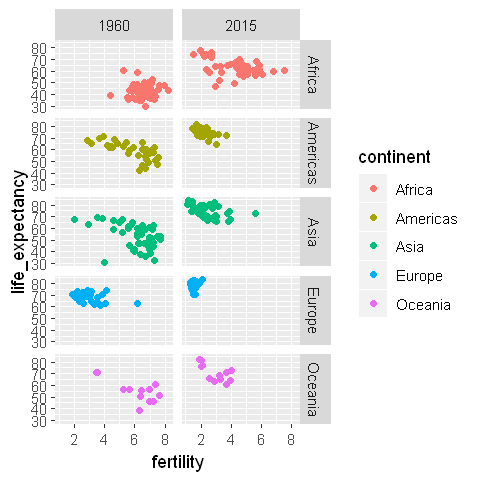

In [34]:
gapminderall %>%
    filter(year==1960 | year==2015) %>%
    ggplot(aes(x=fertility, y=life_expectancy, colour=continent)) +
    geom_point() +
    facet_grid(continent~year)

#### Analysis

* Between 1960 and 2015, every continent has experiences a general shift towards the upper left corner of the graph.
* This indicates modern families are having less children and living longer.
* This is ultimately unsurprising.

Warning message:
"Removed 1 rows containing missing values (geom_point)."

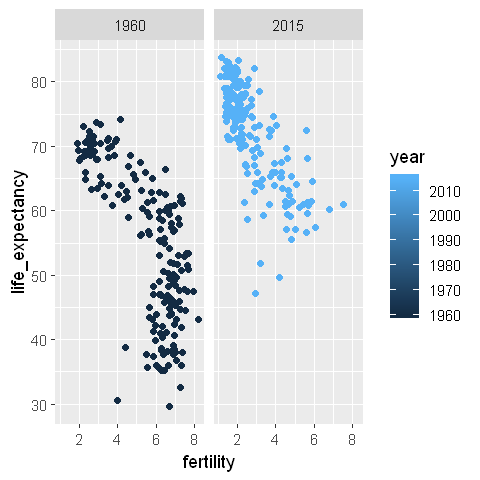

In [35]:
gapminderall %>%
    filter(year %in% c(1960,2015)) %>%
    ggplot(aes(x=fertility, y=life_expectancy, colour=year)) +
    geom_point() +
    facet_grid(.~year)

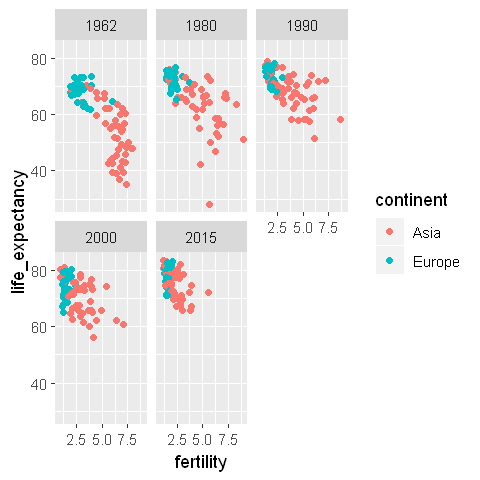

In [36]:
gapminderall %>%
    filter(continent %in% c('Asia', 'Europe')) %>%
    filter(year %in% c(1962, 1980, 1990, 2000, 2015)) %>%
    ggplot(aes(x=fertility, y=life_expectancy, colour=continent)) +
    geom_point() +
    facet_wrap(.~year)

### Question 2

In [38]:
casMotor <- read_csv('data/01/Case Study 2 - CAS Motor/freMTPL2freq.csv', col_types=cols())
head(casMotor, 3)
summary(casMotor)
glimpse(casMotor)

IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region
1,1,0.10,D,5,0,55,50,B12,Regular,1217,R82
3,1,0.77,D,5,0,55,50,B12,Regular,1217,R82
5,1,0.75,B,6,2,52,50,B12,Diesel,54,R22


     IDpol            ClaimNb            Exposure            Area          
 Min.   :      1   Min.   : 0.00000   Min.   :0.002732   Length:678013     
 1st Qu.:1157951   1st Qu.: 0.00000   1st Qu.:0.180000   Class :character  
 Median :2272152   Median : 0.00000   Median :0.490000   Mode  :character  
 Mean   :2621857   Mean   : 0.05325   Mean   :0.528750                     
 3rd Qu.:4046274   3rd Qu.: 0.00000   3rd Qu.:0.990000                     
 Max.   :6114330   Max.   :16.00000   Max.   :2.010000                     
    VehPower          VehAge           DrivAge        BonusMalus    
 Min.   : 4.000   Min.   :  0.000   Min.   : 18.0   Min.   : 50.00  
 1st Qu.: 5.000   1st Qu.:  2.000   1st Qu.: 34.0   1st Qu.: 50.00  
 Median : 6.000   Median :  6.000   Median : 44.0   Median : 50.00  
 Mean   : 6.455   Mean   :  7.044   Mean   : 45.5   Mean   : 59.76  
 3rd Qu.: 7.000   3rd Qu.: 11.000   3rd Qu.: 55.0   3rd Qu.: 64.00  
 Max.   :15.000   Max.   :100.000   Max.   :100.0   Ma

Observations: 678,013
Variables: 12
$ IDpol      <dbl> 1, 3, 5, 10, 11, 13, 15, 17, 18, 21, 25, 27, 30, 32, 35,...
$ ClaimNb    <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...
$ Exposure   <dbl> 0.10, 0.77, 0.75, 0.09, 0.84, 0.52, 0.45, 0.27, 0.71, 0....
$ Area       <chr> "D", "D", "B", "B", "B", "E", "E", "C", "C", "B", "B", "...
$ VehPower   <dbl> 5, 5, 6, 7, 7, 6, 6, 7, 7, 7, 7, 7, 4, 4, 4, 9, 6, 6, 6,...
$ VehAge     <dbl> 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 1, 0, 9, 0, 2, 2, 2,...
$ DrivAge    <dbl> 55, 55, 52, 46, 46, 38, 38, 33, 33, 41, 41, 56, 27, 27, ...
$ BonusMalus <dbl> 50, 50, 50, 50, 50, 50, 50, 68, 68, 50, 50, 50, 90, 90, ...
$ VehBrand   <chr> "B12", "B12", "B12", "B12", "B12", "B12", "B12", "B12", ...
$ VehGas     <chr> "Regular", "Regular", "Diesel", "Diesel", "Diesel", "Reg...
$ Density    <dbl> 1217, 1217, 54, 76, 76, 3003, 3003, 137, 137, 60, 60, 17...
$ Region     <chr> "R82", "R82", "R22", "R72", "R72", "R31", "R31", "R91", ...


In [39]:
casMotor <- casMotor %>% filter(ClaimNb<=3, Exposure<=1)
round(sum(casMotor$ClaimNb) / sum(casMotor$Exposure) * 100, 2)
casMotor$freq <- casMotor$ClaimNb / casMotor$Exposure

[1] 10.06

In [40]:
cols <- c('Area', 'VehBrand', 'VehGas', 'Region')
casMotor[cols] <- lapply(casMotor[cols], factor)
glimpse(casMotor)

Observations: 676,773
Variables: 13
$ IDpol      <dbl> 1, 3, 5, 10, 11, 13, 15, 17, 18, 21, 25, 27, 30, 32, 35,...
$ ClaimNb    <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...
$ Exposure   <dbl> 0.10, 0.77, 0.75, 0.09, 0.84, 0.52, 0.45, 0.27, 0.71, 0....
$ Area       <fct> D, D, B, B, B, E, E, C, C, B, B, C, D, D, E, F, A, A, A,...
$ VehPower   <dbl> 5, 5, 6, 7, 7, 6, 6, 7, 7, 7, 7, 7, 4, 4, 4, 9, 6, 6, 6,...
$ VehAge     <dbl> 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 1, 0, 9, 0, 2, 2, 2,...
$ DrivAge    <dbl> 55, 55, 52, 46, 46, 38, 38, 33, 33, 41, 41, 56, 27, 27, ...
$ BonusMalus <dbl> 50, 50, 50, 50, 50, 50, 50, 68, 68, 50, 50, 50, 90, 90, ...
$ VehBrand   <fct> B12, B12, B12, B12, B12, B12, B12, B12, B12, B12, B12, B...
$ VehGas     <fct> Regular, Regular, Diesel, Diesel, Diesel, Regular, Regul...
$ Density    <dbl> 1217, 1217, 54, 76, 76, 3003, 3003, 137, 137, 60, 60, 17...
$ Region     <fct> R82, R82, R22, R72, R72, R31, R31, R91, R91, R52, R52, R...
$ freq       <db

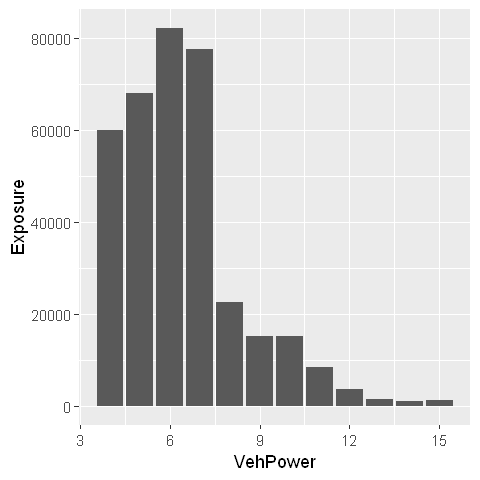

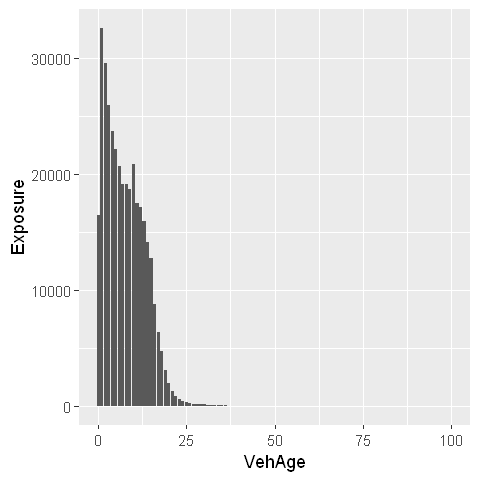

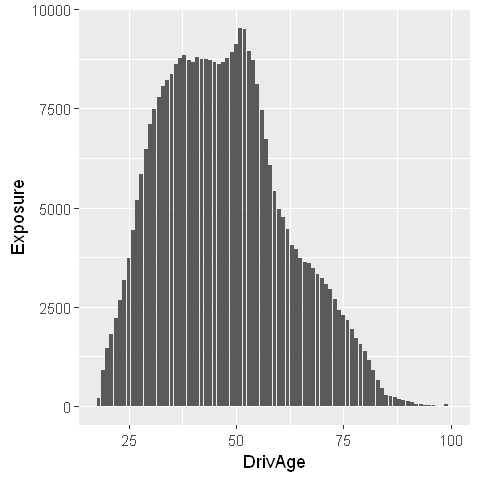

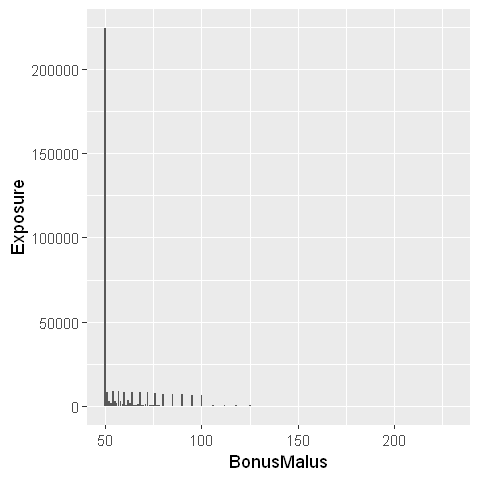

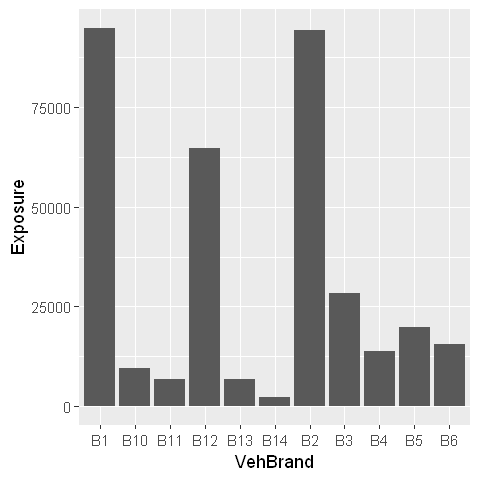

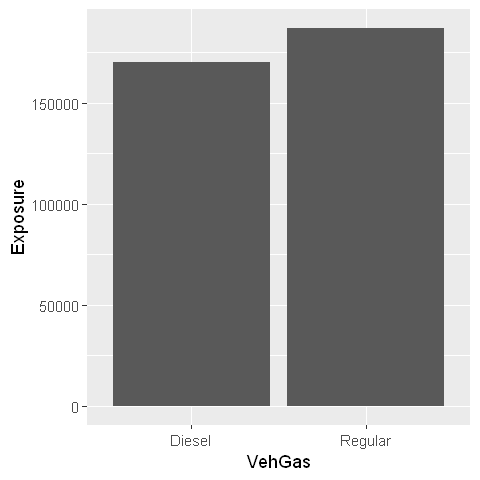

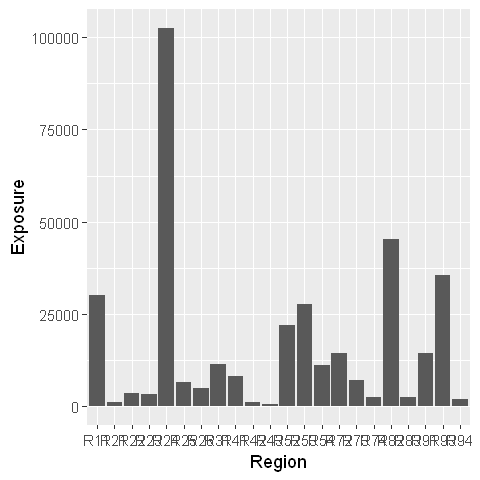

In [41]:
for (var in c('VehPower', 'VehAge', 'DrivAge', 'BonusMalus', 'VehBrand', 'VehGas', 'Region')) {
    print(casMotor %>%
              select(var, Exposure) %>%
              ggplot(aes(x=unlist(casMotor[var]), y=Exposure)) +
              xlab(var) +
              ylab('Exposure') +
              geom_col()
    )
}